<a href="https://colab.research.google.com/github/Legendary-Nerd/CIFAR-Image-Classification/blob/main/CNN_CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# x_train, y_train
x_train.shape, y_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_train , x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the 3D output to 1D
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 classes (Softmax for multi-class)
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3612 - loss: 1.7336 - val_accuracy: 0.5501 - val_loss: 1.2557
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5650 - loss: 1.2142 - val_accuracy: 0.5909 - val_loss: 1.1775
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6353 - loss: 1.0415 - val_accuracy: 0.6403 - val_loss: 1.0299
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6746 - loss: 0.9345 - val_accuracy: 0.6407 - val_loss: 1.0247
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7024 - loss: 0.8479 - val_accuracy: 0.6760 - val_loss: 0.9521
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7276 - loss: 0.7819 - val_accuracy: 0.6903 - val_loss: 0.9109
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7429 - loss: 0.7324 - val_accuracy: 0.7036 - val_loss: 0.8709
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7595 - loss: 0.6860

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6784 - loss: 2.4231
Test accuracy: 0.6762999892234802


In [ ]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
[[1.8867402e-18 6.8567788e-16 4.1714968e-11 9.8865008e-01 2.7425767e-16
  1.1349856e-02 7.8108169e-09 1.2186882e-16 2.4316051e-09 1.4085650e-12]
 [2.4209874e-09 6.0508028e-13 5.9767207e-23 2.1319869e-28 1.1763852e-20
  1.7311834e-30 1.0509925e-32 2.5602669e-33 1.0000000e+00 6.8935311e-16]
 [6.4700758e-03 1.2359347e-05 1.4118035e-07 3.2679424e-07 6.9648979e-07
  5.2559015e-09 2.8492846e-09 1.2898628e-09 9.9330008e-01 2.1629702e-04]
 [9.9999893e-01 1.8823054e-10 1.5766230e-07 2.0340338e-15 7.0502307e-07
  3.5179271e-16 9.9547099e-21 2.8318071e-08 1.1860661e-07 1.2699452e-07]
 [1.1870676e-26 1.0761204e-15 1.1044931e-07 3.0239408e-07 6.9167867e-04
  2.6244880e-11 9.9930787e-01 1.9061563e-25 9.1137855e-21 5.7009294e-15]]


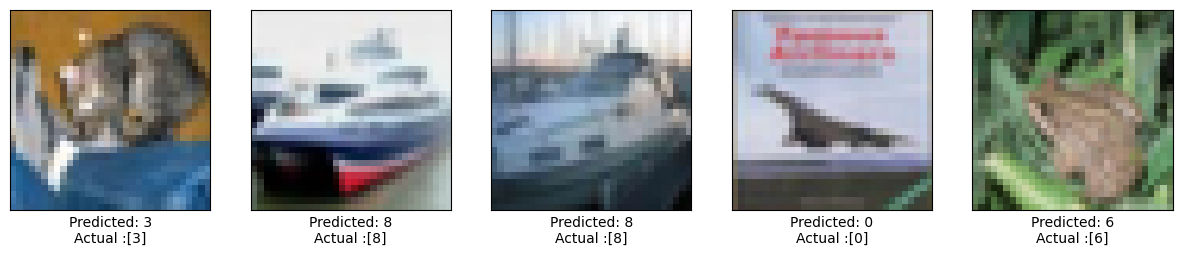

In [ ]:
predictions = model.predict(x_test[:5])  # Predict first 5 images
print(predictions)

plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.xlabel(f"Predicted: {np.argmax(predictions[i])}\nActual :{y_test[i]}")
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(x_test[i])